In [1]:
#libration.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot librating ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity

r.shape =  (1001, 2, 31)
total_ring_mass =  1.5e-09
shear_viscosity =  6e-13


In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

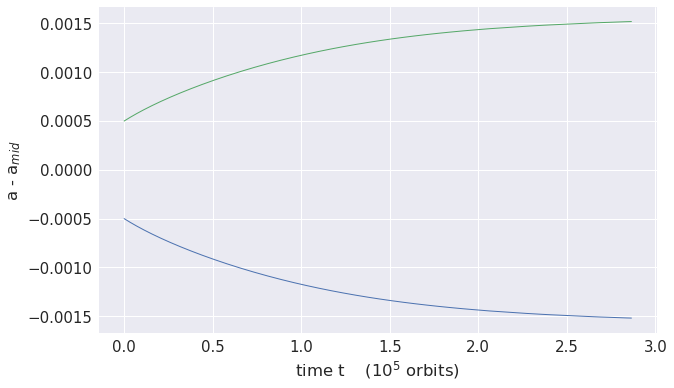

In [4]:
#plot streamline's mutual a-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
a_mid = a.mean(axis=1).mean(axis=1)
for pidx in range(number_of_streamlines):
    y = a[:, pidx].mean(axis=1) - a_mid
    x = times/(2*np.pi)/1.0e5
    p = ax.plot(x, y, marker='o', markersize=0, linestyle='-', linewidth=1, alpha=1)
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel('a - a$_{mid}$')

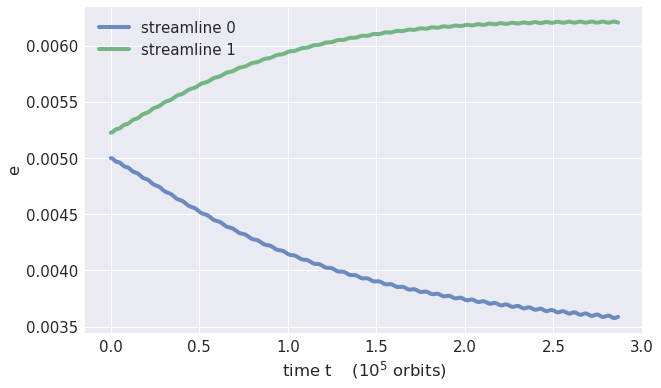

In [5]:
#plot streamline's e-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
e_mid = e[:, number_of_streamlines/2].mean(axis=1)
for pidx in range(number_of_streamlines):
    y = e[:, pidx].mean(axis=1)
    x = times/(2*np.pi)/1.0e5
    lw = 2
    if (pidx ==0) or (pidx == number_of_streamlines/2) or (pidx == number_of_streamlines-1):
        lw = 4
    p = ax.plot(x, y, marker='o', markersize=0, linestyle='-', linewidth=lw, alpha=0.8, label='streamline '+str(pidx))
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel('e')
p = plt.legend()

In [6]:
#compute delta_a=a_outer-a_inner versus time
a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
a_inner = a[:, 0, :].mean(axis=1)
delta_a = a_outer - a_inner

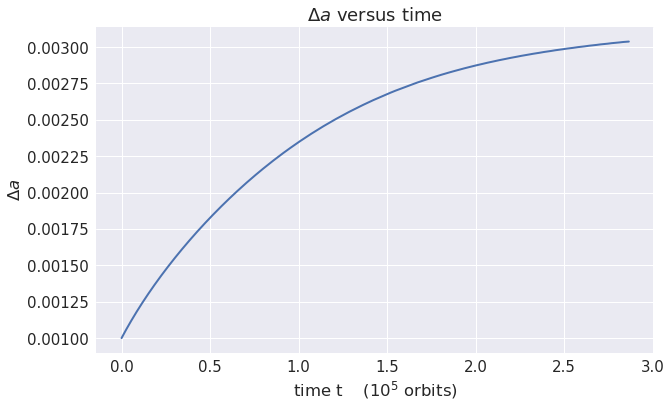

In [7]:
#plot delta_a versus time
x = times/(2*np.pi)/1.0e5
y = delta_a
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta a$')
p = plt.legend()
p = plt.savefig('figs/da.png')

In [8]:
#compute delta_e=e_outer-e_inner and e_prime = a_mid*delta_e/delta_a versus time
e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
e_mid = e[:, number_of_streamlines/2].mean(axis=1)
e_inner = e[:, 0, :].mean(axis=1)
delta_e = e_outer - e_inner
e_prime = a_mid*delta_e/delta_a
wt_outer = wt[:, number_of_streamlines-1, :].mean(axis=1)
wt_inner = wt[:, 0, :].mean(axis=1)
delta_wt = wt_outer - wt_inner

In [9]:
#compute delta_w=wt_outer-wt_inner and wt_prime = a_mid*e_mid*delta_wt/delta_a versus time
delta_wt_list = []
for t_idx in range(len(times)):
    s_idx = 0
    r0 = r[t_idx, s_idx]
    theta_idx = np.argmin(r0)
    wt_inner = wt[t_idx, s_idx, theta_idx]
    s_idx = 1
    r0 = r[t_idx, s_idx]
    theta_idx = np.argmin(r0)
    wt_outer = wt[t_idx, s_idx, theta_idx]
    delta_wt_list += [wt_outer - wt_inner]
delta_wt = adjust_angle(np.array(delta_wt_list))
wt_prime = a_mid*e_mid*delta_wt/delta_a
q = np.sqrt(e_prime**2 + wt_prime**2)

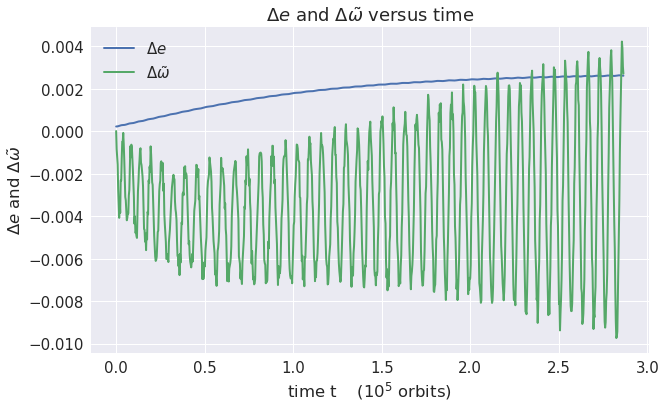

In [10]:
#plot delta_e and delta_wt versus time
x = times/(2*np.pi)/1.0e5
y = delta_e
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e$')
y = delta_wt
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta\tilde{\omega}$')
p = ax.set_title(r'$\Delta e$ and $\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta e$ and $\Delta\tilde{\omega}$')
p = plt.legend()

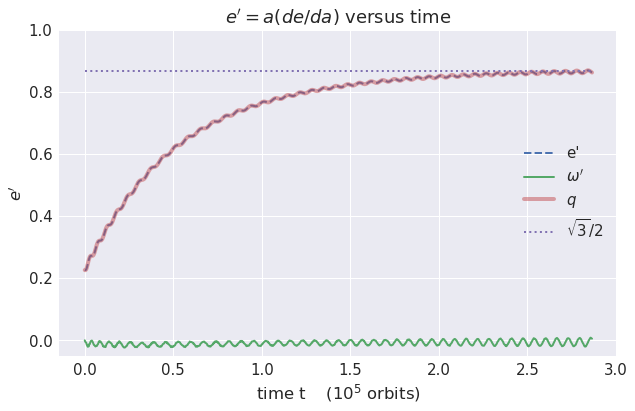

In [11]:
#plot e_prime wt_prime and q versus time
x = times/(2*np.pi)/1.0e5
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='dashed', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r"$\omega'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=4, label=r'$q$', alpha=0.5)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title(r"$e'=a(de/da)$ versus time")
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r"$e'$")
p = ax.set_ylim(-0.05, 1)
p = plt.legend()
p = plt.savefig('figs/adeda.png')

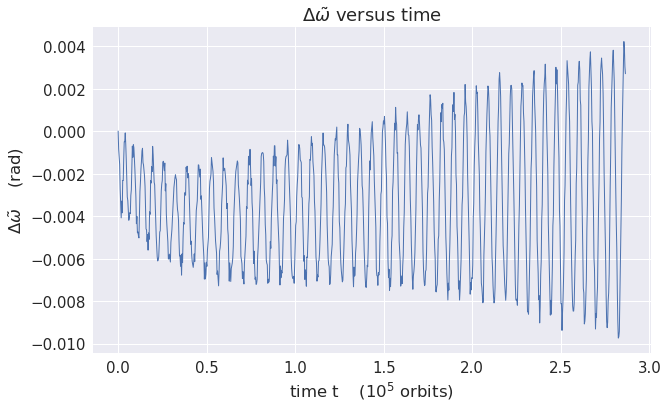

In [12]:
#plot delta_wt versus time
x = times/(2*np.pi)/1.0e5
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (rad)')
p = plt.legend()

In [13]:
#viscous angular momentum flux vs time
c = -1.0
G = -1.0
print c, G, shear_viscosity
flux_list = []
torque_inner_list = []
torque_outer_list = []
viscous_flux_list = []
for t_idx in range(len(times)):
    Ar, At = accelerations(lambda0, G_ring, shear_viscosity, c, r[t_idx], t[t_idx], vt[t_idx])
    viscous_flux = lambda0*r[t_idx]*At
    torque = 2.0*np.pi*r[t_idx]*viscous_flux
    viscous_flux_list += [viscous_flux]
    torque_inner_list += [torque[0].sum()]
    torque_outer_list += [torque[1].sum()]
torque_inner = np.array(torque_inner_list)
torque_outer = np.array(torque_outer_list)
viscous_flux = np.array(viscous_flux_list)

-1.0 -1.0 6e-13


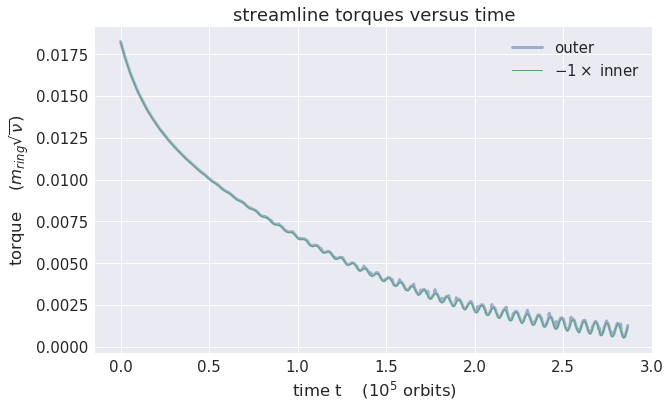

In [14]:
#plot torques versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = torque_outer/total_ring_mass/(shear_viscosity**0.5)
p = ax.plot(x, y, linestyle='-', linewidth=3, label='outer', alpha=0.5)
y = -torque_inner/total_ring_mass/(shear_viscosity**0.5)
p = ax.plot(x, y, linestyle='-', linewidth=1, label=r'$-1\times$ inner')
p = ax.set_title(r'streamline torques versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'torque    ($m_{ring}\sqrt{\nu}$)')
p = plt.legend()

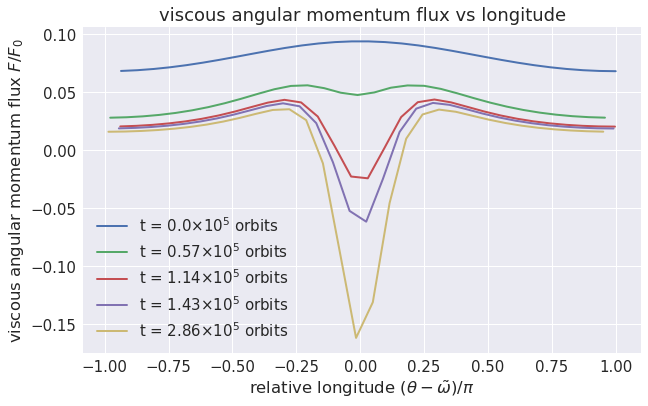

In [15]:
#viscous flux vs longitude
f, ax = plt.subplots(figsize=(10, 6))
time_indices = (np.array([0.0, 0.2, 0.4, 0.5, 1.0])*total_number_of_outputs).astype(int)
#angular momentum flux assuming initially circular ring
Om = Omega(J2, Rp, a[0])
F0 = 1.5*shear_viscosity*(total_ring_mass/radial_width)*Om*a[0]
for t_idx in time_indices:
    s_idx = 1
    t_rotating = adjust_angle(t[t_idx, 1] - wt[t_idx, 1].mean())
    x = t_rotating/np.pi
    y = (viscous_flux[t_idx]/F0)[1]
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    N_orbits = times[t_idx]/(2*np.pi)/1.0e5
    lbl = r't = ' + str(N_orbits)[0:4] + r'$\times10^5$ orbits'
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'viscous angular momentum flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'viscous angular momentum flux $F/F_0$')
p = plt.legend()